### Khor Zhen Win - TP055619
Individual Assignment

### Data Import

In [ ]:
# run this cell to install the required libraries
%pip install pandas
%pip install numpy
%pip install nltk

In [3]:
# import libraries
import pandas as pd
import numpy as np
import nltk
import re

In [ ]:
# run this cell to install all NLTK data
nltk.download('all')

In [2]:
# import data from Data_1.txt where each line is a string
with open('Data_1.txt') as f:
    data1 = f.readlines()
    
# remove whitespace characters like `\n` at the end of each line
# this joins all the data into one paragraph of a single string
data1 = [x.strip() for x in data1]
data1 = ' '.join(data1)
data1

'It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text.'

## Q1. Form Tokenization

#### Sentence Segmentation

In [38]:
sentences = nltk.sent_tokenize(data1, language='english')
print(sentences)
print()
print("Number of sentences: ", len(sentences))
print()

['It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context.', 'However, we can also determine the location of a word in the text: how many words from the beginning it appears.', 'This positional information can be displayed using a dispersion plot.', 'Each stripe represents an instance of a word, and each row represents the entire text.']

Number of sentences:  4



In [39]:
for i in range(len(sentences)):
    print("Sentence " + str(i+1) + ": " + sentences[i])
    print()

Sentence 1: It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context.

Sentence 2: However, we can also determine the location of a word in the text: how many words from the beginning it appears.

Sentence 3: This positional information can be displayed using a dispersion plot.

Sentence 4: Each stripe represents an instance of a word, and each row represents the entire text.



#### Word Tokenization


##### Split Function

In [40]:
# using python split function to split sentences into words with default delimiter of space
sentence_token_1_split = sentences[0].split()
sentence_token_2_split = sentences[1].split()
sentence_token_3_split = sentences[2].split()
sentence_token_4_split = sentences[3].split()

print("There are ", len(sentence_token_1_split), "tokens in sentence 1\n")
print("There are ", len(sentence_token_2_split), "tokens in sentence 2\n")
print("There are ", len(sentence_token_3_split), "tokens in sentence 3\n")
print("There are ", len(sentence_token_4_split), "tokens in sentence 4\n")

There are  26 tokens in sentence 1

There are  21 tokens in sentence 2

There are  10 tokens in sentence 3

There are  15 tokens in sentence 4



In [41]:
# detect the longest length of the list of the 4 variables
max_len = max(len(sentence_token_1_split), len(sentence_token_2_split), len(sentence_token_3_split), len(sentence_token_4_split))

# normalize all the 4 variables into the max length (fill the empty space with NaN)
sentence_token_1_split = sentence_token_1_split + (max_len - len(sentence_token_1_split)) * [np.nan]
sentence_token_2_split = sentence_token_2_split + (max_len - len(sentence_token_2_split)) * [np.nan]
sentence_token_3_split = sentence_token_3_split + (max_len - len(sentence_token_3_split)) * [np.nan]
sentence_token_4_split = sentence_token_4_split + (max_len - len(sentence_token_4_split)) * [np.nan]

# create a dataframe with the 4 variables (show NaN as empty space)
df_token_split = pd.DataFrame({'Sentence 1': sentence_token_1_split, 
                              'Sentence 2': sentence_token_2_split, 
                              'Sentence 3': sentence_token_3_split, 
                              'Sentence 4': sentence_token_4_split}).fillna('')
df_token_split

,Sentence 1,Sentence 2,Sentence 3,Sentence 4
0,It,"However,",This,Each
1,is,we,positional,stripe
2,one,can,information,represents
3,thing,also,can,an
4,to,determine,be,instance
5,automatically,the,displayed,of
6,detect,location,using,a
7,that,of,a,"word,"
8,a,a,dispersion,and
9,particular,word,plot.,each


##### Regular Expression

In [42]:
# using regex to split sentences into words and remove empty strings
sentence_token_1_re = re.split(r'\W+', sentences[0])
sentence_token_2_re = re.split(r'\W+', sentences[1])
sentence_token_3_re = re.split(r'\W+', sentences[2])
sentence_token_4_re = re.split(r'\W+', sentences[3])

print("There are ", len(sentence_token_1_re), "tokens in sentence 1\n")
print("There are ", len(sentence_token_2_re), "tokens in sentence 2\n")
print("There are ", len(sentence_token_3_re), "tokens in sentence 3\n")
print("There are ", len(sentence_token_4_re), "tokens in sentence 4\n")

There are  27 tokens in sentence 1

There are  22 tokens in sentence 2

There are  11 tokens in sentence 3

There are  16 tokens in sentence 4



In [43]:
sentence_token_1_re

['It',
 'is',
 'one',
 'thing',
 'to',
 'automatically',
 'detect',
 'that',
 'a',
 'particular',
 'word',
 'occurs',
 'in',
 'a',
 'text',
 'and',
 'to',
 'display',
 'some',
 'words',
 'that',
 'appear',
 'in',
 'the',
 'same',
 'context',
 '']

In [44]:
# filtering out empty strings
sentence_token_1_re = list(filter(None, sentence_token_1_re))
sentence_token_2_re = list(filter(None, sentence_token_2_re))
sentence_token_3_re = list(filter(None, sentence_token_3_re))
sentence_token_4_re = list(filter(None, sentence_token_4_re))

print("There are ", len(sentence_token_1_re), "tokens in sentence 1\n")
print("There are ", len(sentence_token_2_re), "tokens in sentence 2\n")
print("There are ", len(sentence_token_3_re), "tokens in sentence 3\n")
print("There are ", len(sentence_token_4_re), "tokens in sentence 4\n")

There are  26 tokens in sentence 1

There are  21 tokens in sentence 2

There are  10 tokens in sentence 3

There are  15 tokens in sentence 4



In [45]:
# detect the longest length of the list of the 4 variables
max_len = max(len(sentence_token_1_re), len(sentence_token_2_re), len(sentence_token_3_re), len(sentence_token_4_re))

# normalize all the 4 variables into the max length (fill the empty space with NaN)
sentence_token_1_re = sentence_token_1_re + (max_len - len(sentence_token_1_re)) * [np.nan]
sentence_token_2_re = sentence_token_2_re + (max_len - len(sentence_token_2_re)) * [np.nan]
sentence_token_3_re = sentence_token_3_re + (max_len - len(sentence_token_3_re)) * [np.nan]
sentence_token_4_re = sentence_token_4_re + (max_len - len(sentence_token_4_re)) * [np.nan]

# create a dataframe with the 4 variables (show NaN as empty space)
df_token_re = pd.DataFrame({'Sentence 1': sentence_token_1_re, 
                              'Sentence 2': sentence_token_2_re, 
                              'Sentence 3': sentence_token_3_re, 
                              'Sentence 4': sentence_token_4_re}).fillna('')
df_token_re

,Sentence 1,Sentence 2,Sentence 3,Sentence 4
0,It,However,This,Each
1,is,we,positional,stripe
2,one,can,information,represents
3,thing,also,can,an
4,to,determine,be,instance
5,automatically,the,displayed,of
6,detect,location,using,a
7,that,of,a,word
8,a,a,dispersion,and
9,particular,word,plot,each


##### NLTK Library

In [46]:
# using nltk to tokenize the sentences
sentence_token_1_nltk = nltk.word_tokenize(sentences[0])
sentence_token_2_nltk = nltk.word_tokenize(sentences[1])
sentence_token_3_nltk = nltk.word_tokenize(sentences[2])
sentence_token_4_nltk = nltk.word_tokenize(sentences[3])

print("There are ", len(sentence_token_1_nltk), "tokens in sentence 1\n")
print("There are ", len(sentence_token_2_nltk), "tokens in sentence 2\n")
print("There are ", len(sentence_token_3_nltk), "tokens in sentence 3\n")
print("There are ", len(sentence_token_4_nltk), "tokens in sentence 4\n")

There are  28 tokens in sentence 1

There are  24 tokens in sentence 2

There are  11 tokens in sentence 3

There are  17 tokens in sentence 4



In [47]:
# detect the longest length of the list of the 4 variables
max_len = max(len(sentence_token_1_nltk), len(sentence_token_2_nltk), len(sentence_token_3_nltk), len(sentence_token_4_nltk))

# normalize all the 4 variables into the max length (fill the empty space with NaN)
sentence_token_1_nltk = sentence_token_1_nltk + (max_len - len(sentence_token_1_nltk)) * [np.nan]
sentence_token_2_nltk = sentence_token_2_nltk + (max_len - len(sentence_token_2_nltk)) * [np.nan]
sentence_token_3_nltk = sentence_token_3_nltk + (max_len - len(sentence_token_3_nltk)) * [np.nan]
sentence_token_4_nltk = sentence_token_4_nltk + (max_len - len(sentence_token_4_nltk)) * [np.nan]

# create a dataframe with the 4 variables (show NaN as empty space)
df_token_nltk = pd.DataFrame({'Sentence 1': sentence_token_1_nltk, 
                              'Sentence 2': sentence_token_2_nltk, 
                              'Sentence 3': sentence_token_3_nltk, 
                              'Sentence 4': sentence_token_4_nltk}).fillna('')
df_token_nltk

,Sentence 1,Sentence 2,Sentence 3,Sentence 4
0,It,However,This,Each
1,is,",",positional,stripe
2,one,we,information,represents
3,thing,can,can,an
4,to,also,be,instance
5,automatically,determine,displayed,of
6,detect,the,using,a
7,that,location,a,word
8,a,of,dispersion,","
9,particular,a,plot,and


## Q2. Form Word Stemming

### Regular Expression

In [13]:
import re 
import nltk

def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

tokens = nltk.tokenize.word_tokenize(data1) # Word Tokenization

print("Original TOKENS: ", len(tokens))
print(tokens)
print()
print("RegEx Stemming: ", len([stem(t) for t in tokens]))
print([stem(t) for t in tokens])

Original TOKENS:  80
['It', 'is', 'one', 'thing', 'to', 'automatically', 'detect', 'that', 'a', 'particular', 'word', 'occurs', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'words', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'However', ',', 'we', 'can', 'also', 'determine', 'the', 'location', 'of', 'a', 'word', 'in', 'the', 'text', ':', 'how', 'many', 'words', 'from', 'the', 'beginning', 'it', 'appears', '.', 'This', 'positional', 'information', 'can', 'be', 'displayed', 'using', 'a', 'dispersion', 'plot', '.', 'Each', 'stripe', 'represents', 'an', 'instance', 'of', 'a', 'word', ',', 'and', 'each', 'row', 'represents', 'the', 'entire', 'text', '.']

RegEx Stemming:  80
['It', 'i', 'one', 'th', 'to', 'automatical', 'detect', 'that', 'a', 'particular', 'word', 'occur', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'word', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'However', ',', 'we', 'can', 'also', 'determine', 'the', 'location', 'of', 'a', 

### Porter Stemmer

In [14]:
import nltk

ps = nltk.stem.PorterStemmer()
tokens = nltk.tokenize.word_tokenize(data1) # Word Tokenization

print("Original TOKENS: ", len(tokens))
print(tokens)
print()
print("Porter Stemmer: ", len([ps.stem(t) for t in tokens]))
print([ps.stem(t) for t in tokens])

Original TOKENS:  80
['It', 'is', 'one', 'thing', 'to', 'automatically', 'detect', 'that', 'a', 'particular', 'word', 'occurs', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'words', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'However', ',', 'we', 'can', 'also', 'determine', 'the', 'location', 'of', 'a', 'word', 'in', 'the', 'text', ':', 'how', 'many', 'words', 'from', 'the', 'beginning', 'it', 'appears', '.', 'This', 'positional', 'information', 'can', 'be', 'displayed', 'using', 'a', 'dispersion', 'plot', '.', 'Each', 'stripe', 'represents', 'an', 'instance', 'of', 'a', 'word', ',', 'and', 'each', 'row', 'represents', 'the', 'entire', 'text', '.']

Porter Stemmer:  80
['it', 'is', 'one', 'thing', 'to', 'automat', 'detect', 'that', 'a', 'particular', 'word', 'occur', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'word', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'howev', ',', 'we', 'can', 'also', 'determin', 'the', 'locat', 'of', 'a', 'word'

### Lancaster Stemmer

In [15]:
import nltk

ls = nltk.stem.LancasterStemmer()
tokens = nltk.tokenize.word_tokenize(data1) # Word Tokenization

print("Original TOKENS: ", len(tokens))
print(tokens)
print()
print("Lancaster Stemmer: ", len([ls.stem(t) for t in tokens]))
print([ls.stem(t) for t in tokens])

Original TOKENS:  80
['It', 'is', 'one', 'thing', 'to', 'automatically', 'detect', 'that', 'a', 'particular', 'word', 'occurs', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'words', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'However', ',', 'we', 'can', 'also', 'determine', 'the', 'location', 'of', 'a', 'word', 'in', 'the', 'text', ':', 'how', 'many', 'words', 'from', 'the', 'beginning', 'it', 'appears', '.', 'This', 'positional', 'information', 'can', 'be', 'displayed', 'using', 'a', 'dispersion', 'plot', '.', 'Each', 'stripe', 'represents', 'an', 'instance', 'of', 'a', 'word', ',', 'and', 'each', 'row', 'represents', 'the', 'entire', 'text', '.']

Lancaster Stemmer:  80
['it', 'is', 'on', 'thing', 'to', 'autom', 'detect', 'that', 'a', 'particul', 'word', 'occ', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'som', 'word', 'that', 'appear', 'in', 'the', 'sam', 'context', '.', 'howev', ',', 'we', 'can', 'also', 'determin', 'the', 'loc', 'of', 'a', 'word', 'in', 

## Q3. Filter Stop Words & Punctuation

In [5]:
import nltk, string

# normalize data to lower case
text_lower = data1.lower()
# tokenize words
word_tokens = nltk.tokenize.word_tokenize(text_lower)
# get stop words from nltk library and punctuations from string library
stop_tokens = nltk.corpus.stopwords.words("english") + list(string.punctuation)
filtered_tokens = []

# filtering stop words and punctuations
for w in word_tokens:
    if w not in stop_tokens :
        filtered_tokens.append(w)

print("Original Text Corpus Length : ",len(word_tokens))
print("Filtered Text Corpus Length : ",len(filtered_tokens))
print("\nOriginal Text Corpus :\n",word_tokens)
print("\nFiltered Text Corpus :\n",filtered_tokens)

Original Text Corpus Length :  80
Filtered Text Corpus Length :  36

Original Text Corpus :
 ['it', 'is', 'one', 'thing', 'to', 'automatically', 'detect', 'that', 'a', 'particular', 'word', 'occurs', 'in', 'a', 'text', ',', 'and', 'to', 'display', 'some', 'words', 'that', 'appear', 'in', 'the', 'same', 'context', '.', 'however', ',', 'we', 'can', 'also', 'determine', 'the', 'location', 'of', 'a', 'word', 'in', 'the', 'text', ':', 'how', 'many', 'words', 'from', 'the', 'beginning', 'it', 'appears', '.', 'this', 'positional', 'information', 'can', 'be', 'displayed', 'using', 'a', 'dispersion', 'plot', '.', 'each', 'stripe', 'represents', 'an', 'instance', 'of', 'a', 'word', ',', 'and', 'each', 'row', 'represents', 'the', 'entire', 'text', '.']

Filtered Text Corpus :
 ['one', 'thing', 'automatically', 'detect', 'particular', 'word', 'occurs', 'text', 'display', 'words', 'appear', 'context', 'however', 'also', 'determine', 'location', 'word', 'text', 'many', 'words', 'beginning', 'appears

In [6]:
print("STOPWORDS")
print(nltk.corpus.stopwords.words("english"))

print("\nPUNCTUATIONS")
print(list(string.punctuation))

STOPWORDS
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

In [15]:
# finding stop words and punctuations
stop_words = []
punctuations = []

for w in word_tokens:
    if w in nltk.corpus.stopwords.words("english") :
        stop_words.append(w)
    elif w in list(string.punctuation):
        punctuations.append(w)
        
print(f"\nStop Words In Text Corpus : {len(stop_words)}\n{stop_words}")
print(f"\nPunctuations In Text Corpus :{len(punctuations)}\n{punctuations}")

# remove duplicates
print(f"\nStop Words In Text Corpus (without duplicates) :{len(list(set(stop_words)))}\n{list(set(stop_words))}")
print(f"\nPunctuations In Text Corpus (without duplicates) :{len(list(set(punctuations)))}\n{list(set(punctuations))}")


Stop Words In Text Corpus : 36
['it', 'is', 'to', 'that', 'a', 'in', 'a', 'and', 'to', 'some', 'that', 'in', 'the', 'same', 'we', 'can', 'the', 'of', 'a', 'in', 'the', 'how', 'from', 'the', 'it', 'this', 'can', 'be', 'a', 'each', 'an', 'of', 'a', 'and', 'each', 'the']

Punctuations In Text Corpus :8
[',', '.', ',', ':', '.', '.', ',', '.']

Stop Words In Text Corpus (without duplicates) :19
['of', 'it', 'is', 'and', 'the', 'how', 'we', 'in', 'a', 'same', 'this', 'to', 'can', 'an', 'that', 'each', 'be', 'some', 'from']

Punctuations In Text Corpus (without duplicates) :3
['.', ',', ':']


## Q4. POS Taggers & Syntactic Analysers

In [2]:
# import data from Data_2.txt where each line is a string
with open('Data_2.txt') as f:
    data2 = f.readlines()
    
# remove whitespace characters like `\n` at the end of each line
data2 = [x.strip() for x in data2]
data2 = ' '.join(data2)
data2

'The big black dog barked at the white cat and chased away.'

### NLTK POS Tagger

In [4]:
import nltk 

# tokenize words
word_tokens = nltk.tokenize.word_tokenize(data2)
# pos tagger
nltk_tags = nltk.pos_tag(word_tokens)
nltk_tags

[('The', 'DT'),
 ('big', 'JJ'),
 ('black', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('white', 'JJ'),
 ('cat', 'NN'),
 ('and', 'CC'),
 ('chased', 'VBD'),
 ('away', 'RB'),
 ('.', '.')]

### TextBlob Tagger

In [6]:
from textblob import TextBlob
textblob_tags = TextBlob(data2).tags
textblob_tags

[('The', 'DT'),
 ('big', 'JJ'),
 ('black', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('white', 'JJ'),
 ('cat', 'NN'),
 ('and', 'CC'),
 ('chased', 'VBD'),
 ('away', 'RB')]

### Regular Expression Tagger

In [7]:
import nltk
from nltk.tokenize import word_tokenize

patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN'),                    # nouns (default)
     (r'^\d+$', 'CD'),
     (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
     (r'.*ment$', 'NN'),               # i.e. wonderment
     (r'.*ful$', 'JJ')                 # i.e. wonderful
]

# tokenize words
word_tokens = nltk.tokenize.word_tokenize(data2)
# register patterns to regex tagger
regex_tagger = nltk.RegexpTagger(patterns)
# tag the tokens
regex_tags = regex_tagger.tag(word_tokens)
regex_tags

[('The', 'NN'),
 ('big', 'NN'),
 ('black', 'NN'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'NN'),
 ('the', 'NN'),
 ('white', 'NN'),
 ('cat', 'NN'),
 ('and', 'NN'),
 ('chased', 'VBD'),
 ('away', 'NN'),
 ('.', 'NN')]

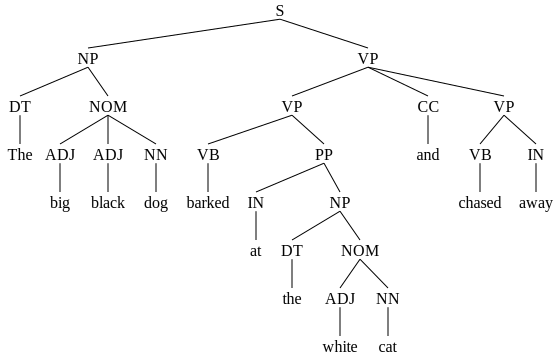

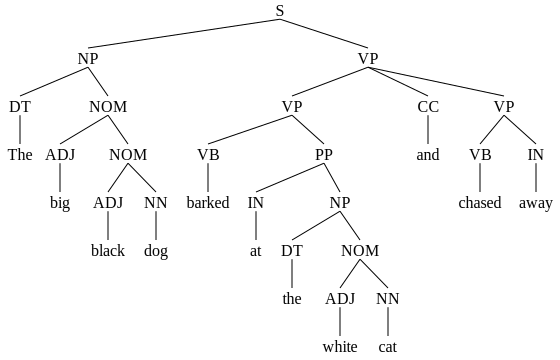

In [25]:
# Draw possible parse trees for the given sentence using nltk.CFG.fromstring
import nltk

parse_tree = nltk.CFG.fromstring("""
S -> NP VP
NP -> DT NOM | DT NN | NP PP | NP CC NP
NOM -> ADJ NOM | ADJ NN | ADJ ADJ NN
VP -> VB NP | VB PP | VP CC VP | VB IN | VP CC VP
PP -> IN NP
DT -> 'The' | 'the'
NN -> 'dog' | 'cat'
VB -> 'barked' | 'chased'
ADJ -> 'big' | 'black' | 'white'
IN -> 'at' | 'away'
CC -> 'and'
""")
parser = nltk.ChartParser(parse_tree)
word_tokens = nltk.tokenize.word_tokenize(data2)

for tree in parser.parse(word_tokens[:-1]):
    display(tree)